In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

#### Import Libraries

In [55]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
from ultralytics import YOLO
import time

#### Load Models

In [16]:
models = {
    "YOLOv8l": YOLO('yolov8l.pt'),
    "YOLOv8m": YOLO('yolov8m.pt'),
    "YOLOv8l-OIV7": YOLO('yolov8l-oiv7.pt'),
    "YOLOv8m-OIV7": YOLO('yolov8m-oiv7.pt')
}

100%|██████████| 49.7M/49.7M [00:00<00:00, 189MB/s]


#### Load & Prepare Image

In [80]:
def load_image(image_path):

    image = cv.imread(image_path)

    # Convert the image to a format suitable for OpenCV
    image = np.array(image)

    return image

In [81]:
# image_path = "/content/dog_bike_car.jpg"
image_path = "/content/object-recognition-using-python.jpg"
image = load_image(image_path)

#### Object Detection

In [72]:
def detect_objects(model, image):
    start_time = time.time()

    # Perform object detection
    results = model(image)

    end_time = time.time()

    # Extract labels and confidence scores
    names = model.names
    detections = []
    bboxes = []
    for result in results:
        for detection in result.boxes.data:
            xmin, ymin, xmax, ymax, confidence, cls_id = detection[:6]
            cls_id = int(cls_id)
            confidence = float(confidence)
            label = names[cls_id]
            detections.append((label, confidence))
            bboxes.append((xmin, ymin, xmax, ymax))

    detection_time = end_time - start_time

    return detections, detection_time, bboxes

#### Testing Different models

In [82]:
# Perform object detection with each model and store the results
all_results = {}
for model_name, model in models.items():
    print(f"Stats for : {model_name}")
    detected_labels_confidences, detection_time, bounding_boxes = detect_objects(model, image)
    print("\n")
    all_results[model_name] = {
                "detections": detected_labels_confidences,
                "time": detection_time,
                "Boxes": bounding_boxes}

Stats for : YOLOv8l

0: 352x640 14 persons, 14 cars, 2 buss, 1 truck, 3 traffic lights, 2 backpacks, 2205.4ms
Speed: 6.9ms preprocess, 2205.4ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)


Stats for : YOLOv8m

0: 352x640 18 persons, 16 cars, 3 trucks, 1 traffic light, 883.9ms
Speed: 3.9ms preprocess, 883.9ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)


Stats for : YOLOv8l-OIV7

0: 352x640 6 Cars, 3 Persons, 2 Taxis, 1 Truck, 1760.0ms
Speed: 3.6ms preprocess, 1760.0ms inference, 4.2ms postprocess per image at shape (1, 3, 352, 640)


Stats for : YOLOv8m-OIV7

0: 352x640 11 Cars, 5 Persons, 1 Taxi, 1 Truck, 916.8ms
Speed: 3.6ms preprocess, 916.8ms inference, 4.2ms postprocess per image at shape (1, 3, 352, 640)




#### Comapring Models Detection

In [83]:
# Display the results for each model
for model_name, results in all_results.items():
    print(f"Results for {model_name}:")
    print(f"Time taken for detection: {results['time']:.2f} seconds")
    print(f"Number of detected objects: {len(results['detections'])}\n")
    print(f"Coordinates : {results['Boxes']}")
    print("Detected Objects:")
    labels = []
    for label, confidence in results["detections"]:
        print(f'Label: {label}, Confidence: {confidence* 100:.2f}%')
        labels.append(label)
    print(f"Names of the components detected in the uploaded image: {labels}")
    print('\n')

Results for YOLOv8l:
Time taken for detection: 2.23 seconds
Number of detected objects: 36

Coordinates : [(tensor(405.2983), tensor(376.5566), tensor(563.6800), tensor(514.7915)), (tensor(535.0573), tensor(607.4912), tensor(960.2842), tensor(727.6750)), (tensor(1038.1205), tensor(390.9014), tensor(1317.1884), tensor(610.7153)), (tensor(450.4961), tensor(503.8873), tensor(654.0228), tensor(686.0283)), (tensor(907.3408), tensor(369.8870), tensor(1007.6211), tensor(453.6525)), (tensor(26.7485), tensor(616.3565), tensor(466.6430), tensor(727.7108)), (tensor(249.3079), tensor(376.9101), tensor(394.6039), tensor(503.9162)), (tensor(1192.5981), tensor(546.0806), tensor(1243.6132), tensor(708.0031)), (tensor(1224.0974), tensor(537.2762), tensor(1267.0967), tensor(699.1752)), (tensor(76.6719), tensor(456.4941), tensor(132.9551), tensor(603.6992)), (tensor(1021.2449), tensor(404.3285), tensor(1105.0889), tensor(553.8213)), (tensor(520.7895), tensor(166.4340), tensor(592.5335), tensor(224.8311))

In [45]:
results

{'detections': [('Bicycle wheel', 0.9520399570465088),
  ('Dog', 0.8448992967605591),
  ('Bicycle', 0.8234407305717468),
  ('Wheel', 0.8113489151000977),
  ('Tire', 0.6184363961219788),
  ('Wheel', 0.5189030766487122),
  ('Wheel', 0.46250221133232117),
  ('Van', 0.44340434670448303),
  ('Wheel', 0.33603033423423767),
  ('Car', 0.32343438267707825)],
 'time': 1.2107515335083008,
 'Boxes': [(tensor(375.9014),
   tensor(241.3079),
   tensor(566.7061),
   tensor(421.5734)),
  (tensor(129.8734), tensor(222.8035), tensor(310.9950), tensor(541.1878)),
  (tensor(126.2030), tensor(124.4015), tensor(567.8521), tensor(433.1631)),
  (tensor(380.1112), tensor(241.5853), tensor(566.7062), tensor(421.8413)),
  (tensor(378.7816), tensor(240.0614), tensor(566.5071), tensor(421.5166)),
  (tensor(509.6406), tensor(129.7998), tensor(541.2986), tensor(159.6931)),
  (tensor(637.3747), tensor(141.5771), tensor(668.7286), tensor(170.1832)),
  (tensor(464.0414), tensor(72.7379), tensor(693.3588), tensor(170.04

#### Drawing Bounding boxes for each model

In [77]:
def draw_bounding_boxes(image, detections, boxes):
    for (label, confidence), box in zip(detections, boxes):
        # Get the bounding box coordinates
        # Convert the box tensors to a NumPy array
        box_array = np.array(box)
        x_min, y_min, x_max, y_max = box_array[0:4].astype(int)

        # Draw the bounding box
        cv.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Add the label and confidence score to the image
        label_text = f"{label} {confidence * 100:.2f}%"
        cv.putText(image, label_text, (x_min, y_min - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

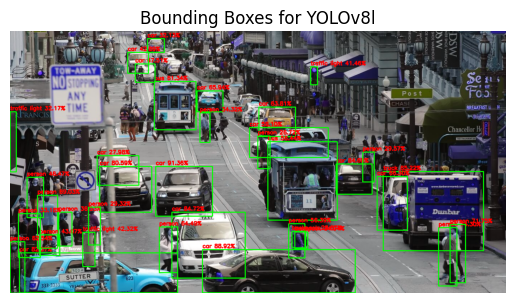

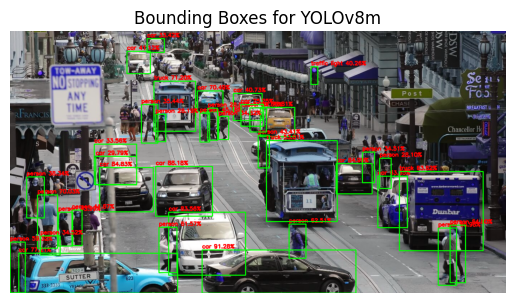

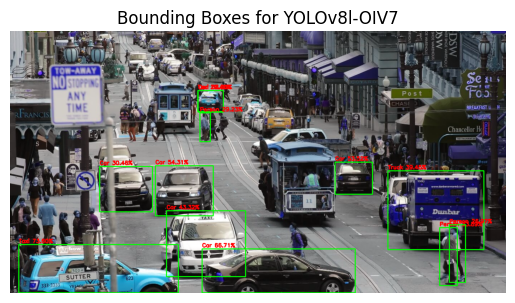

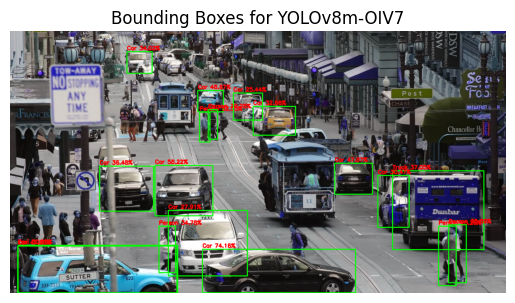

In [84]:
for model_name , results in all_results.items():
    image_with_bb = image.copy()
    # Draw bounding boxes on the image for specific model
    image_with_bounding_boxes = draw_bounding_boxes(image_with_bb, all_results[model_name]["detections"], all_results[model_name]["Boxes"])

    # Display the image with bounding boxes
    plt.title(f"Bounding Boxes for {model_name}")
    plt.imshow(image_with_bounding_boxes)
    plt.axis('off')
    plt.show()

    image = load_image(image_path)

#### Drawing Bounding Boxes for one model

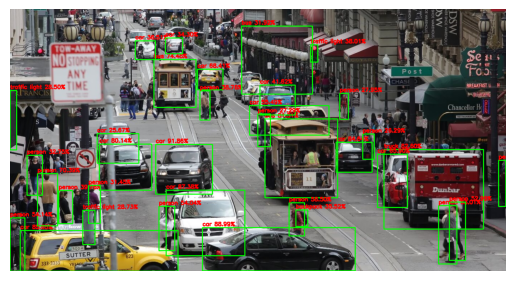

In [79]:
# Draw bounding boxes on the image for specific model
image_with_bounding_boxes = draw_bounding_boxes(image, all_results["YOLOv8l"]["detections"], all_results["YOLOv8l"]["Boxes"])

# Display the image with bounding boxes
plt.imshow(image_with_bounding_boxes)
plt.axis('off')
plt.show()